In [1]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import metrics
plt.rcParams['font.size'] = 14
#plt.style.use('seaborn-whitegrid')
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
from sklearn.model_selection import train_test_split
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis as QDA
from sklearn.preprocessing import binarize
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.linalg import eigh as sp_eigh
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from mlxtend.plotting import plot_decision_regions
from sklearn.metrics import PrecisionRecallDisplay

In [3]:
df = pd.read_csv('diabetes.csv')
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [6]:
X = df.drop(columns=['Outcome'])
y = df['Outcome']

In [7]:
X_train, X_test,y_train, y_test = train_test_split(X,y, test_size = 0.2)

In [8]:
lda = LDA(solver='lsqr')
lda = lda.fit(X_train, y_train)
lda

LinearDiscriminantAnalysis(solver='lsqr')

In [9]:
lda.covariance_

array([[ 1.10850452e+01,  4.46213605e+00,  8.11112839e+00,
        -4.66038708e+00, -3.81712262e+01, -7.78659630e-01,
        -7.29216072e-02,  1.94214649e+01],
       [ 4.46213605e+00,  7.77911748e+02,  7.81055349e+01,
         8.78200282e+00,  9.13783579e+02,  2.19935950e+01,
         4.09803154e-01,  5.69883967e+01],
       [ 8.11112839e+00,  7.81055349e+01,  4.00962658e+02,
         6.92648430e+01,  1.69942832e+02,  4.87966666e+01,
         4.78972714e-01,  5.37611001e+01],
       [-4.66038708e+00,  8.78200282e+00,  6.92648430e+01,
         2.58698598e+02,  7.68993195e+02,  4.74572451e+01,
         8.77523685e-01, -2.07521701e+01],
       [-3.81712262e+01,  9.13783579e+02,  1.69942832e+02,
         7.68993195e+02,  1.27983572e+04,  1.43322449e+02,
         6.92546947e+00, -9.47732781e+01],
       [-7.78659630e-01,  2.19935950e+01,  4.87966666e+01,
         4.74572451e+01,  1.43322449e+02,  5.90749061e+01,
         3.25714837e-01,  4.28246833e-01],
       [-7.29216072e-02,  4.098031

In [10]:
print('outcome-rate: {0: .4f}'.format(np.sum(y_train)/len(y_train)))
print('score:        {0: .4f}'.format(lda.score(X_train, y_train)))
print('error-rate:   {0: .4f}'.format(1-lda.score(X_train, y_train)))

outcome-rate:  0.3518
score:         0.7736
error-rate:    0.2264


In [11]:
posteriors = lda.predict_proba(X_test)
posteriors[:5, :]

array([[0.84215576, 0.15784424],
       [0.75756773, 0.24243227],
       [0.84651343, 0.15348657],
       [0.8937752 , 0.1062248 ],
       [0.130939  , 0.869061  ]])

In [41]:
thresh = 0.2
y_pred020 = binarize([posteriors[:, 1]], threshold=thresh)[0]
print(metrics.confusion_matrix(y_test, y_pred020))

[[63 39]
 [ 9 43]]


In [34]:
thresh = np.linspace(0, 0.5, num=100)

er   = []  # Total error rate
der  = []  # Defaults error rate
nder = []  # Non-Defaults error rate

for t in thresh:
    # Sort/arrange data
    y_pred_class = binarize([posteriors[:, 1]], threshold=t)[0]
    confm = metrics.confusion_matrix(y_test, y_pred_class)

    # Calculate error rates
    er   = np.append(er, (confm[0, 1] + confm[1, 0]) / len(posteriors))
    der  = np.append(der, confm[1, 0] / np.sum(confm[1, :]))
    nder = np.append(nder, confm[0, 1] / np.sum(confm[0, :]))

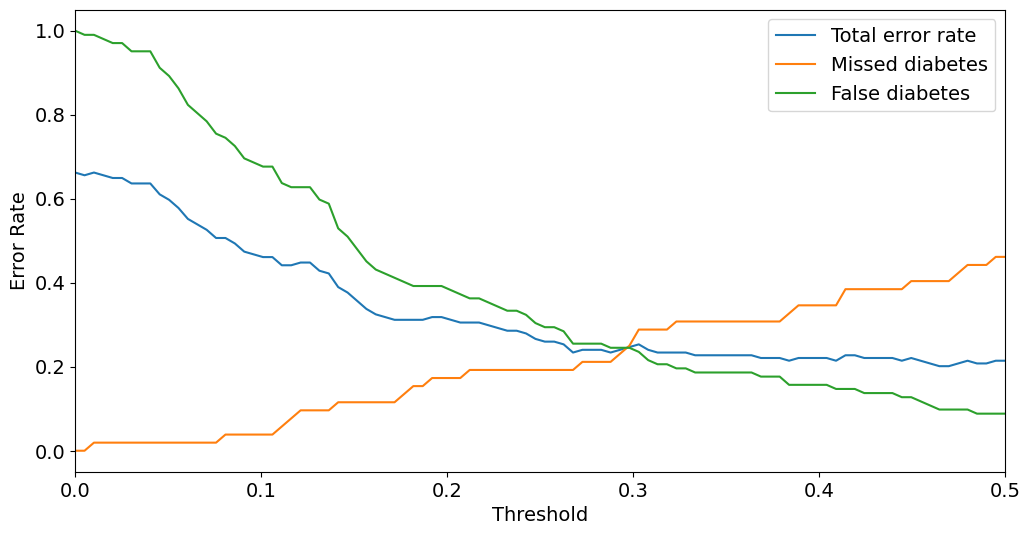

In [35]:
# Plot
plt.figure(figsize=(12, 6))
plt.plot(thresh, er, label='Total error rate')
plt.plot(thresh, der, label='Missed diabetes')
plt.plot(thresh, nder, label='False diabetes')
plt.xlim(0, 0.5)
plt.xlabel('Threshold')
plt.ylabel('Error Rate')
plt.legend();

In [36]:
y_pred = lda.predict(X_test)
print(metrics.confusion_matrix(y_test, y_pred))
print(metrics.f1_score(y_test, y_pred))
print(metrics.classification_report(y_test, y_pred))

[[93  9]
 [24 28]]
0.6292134831460674
              precision    recall  f1-score   support

           0       0.79      0.91      0.85       102
           1       0.76      0.54      0.63        52

    accuracy                           0.79       154
   macro avg       0.78      0.73      0.74       154
weighted avg       0.78      0.79      0.77       154



In [42]:
print(metrics.confusion_matrix(y_test, y_pred020))
print(metrics.classification_report(y_test, y_pred020))

[[63 39]
 [ 9 43]]
              precision    recall  f1-score   support

           0       0.88      0.62      0.72       102
           1       0.52      0.83      0.64        52

    accuracy                           0.69       154
   macro avg       0.70      0.72      0.68       154
weighted avg       0.76      0.69      0.70       154



In [23]:
precision, recall, _ = metrics.precision_recall_curve(y_test, posteriors[:, 1])

print('Precision: ', precision)
print('Recall:    ', recall)

Precision:  [0.33766234 0.33986928 0.33552632 0.33774834 0.34       0.34228188
 0.34459459 0.34693878 0.34931507 0.35172414 0.35416667 0.35664336
 0.35915493 0.36170213 0.36428571 0.36690647 0.36956522 0.37226277
 0.375      0.37777778 0.38059701 0.38345865 0.38636364 0.38931298
 0.39230769 0.39534884 0.3984375  0.39370079 0.3968254  0.4
 0.40322581 0.40650407 0.40983607 0.41322314 0.41666667 0.42016807
 0.42372881 0.41880342 0.42241379 0.42608696 0.42982456 0.43362832
 0.42857143 0.42342342 0.42727273 0.43119266 0.43518519 0.43925234
 0.43396226 0.43809524 0.44230769 0.44660194 0.45098039 0.45544554
 0.46       0.46464646 0.46938776 0.4742268  0.47916667 0.48421053
 0.4893617  0.49462366 0.5        0.50549451 0.51111111 0.51685393
 0.52272727 0.52873563 0.52325581 0.52941176 0.52380952 0.51807229
 0.52439024 0.5308642  0.525      0.53164557 0.53846154 0.54545455
 0.55263158 0.56       0.56756757 0.57534247 0.58333333 0.5915493
 0.6        0.60869565 0.61764706 0.6119403  0.62121212 0.

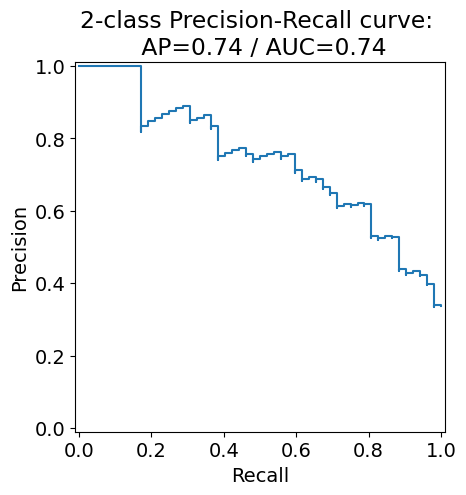

In [24]:
y_dec_bry = lda.decision_function(X_test)
average_precision = metrics.average_precision_score(y_test, y_dec_bry)

prec_recall_auc = metrics.auc(recall, precision)

fig_pr = PrecisionRecallDisplay(precision=precision,
                                recall=recall).plot()
fig_pr.ax_.set_title('2-class Precision-Recall curve: \n AP={0:0.2f} / AUC={1:0.2f}'.format(
                     average_precision, prec_recall_auc));

In [25]:
fpr, tpr, thresholds = metrics.roc_curve(y_test, posteriors[:, 1])
roc_auc = metrics.auc(fpr, tpr)

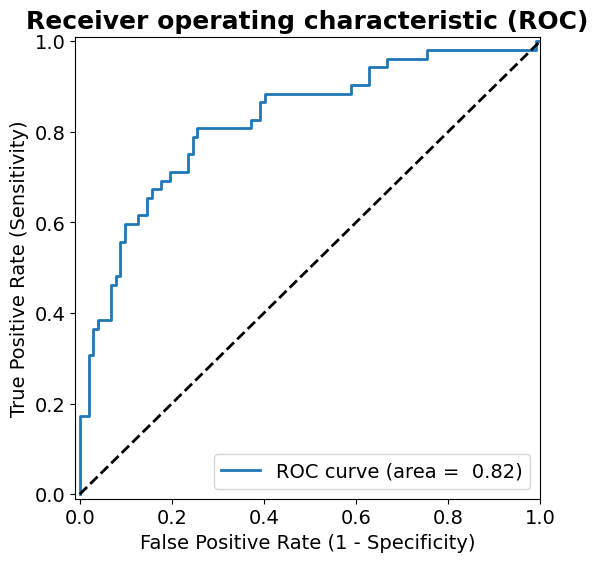

In [26]:
plt.figure(figsize=(6, 6))
plt.plot(fpr, tpr, lw=2, label='ROC curve (area = {0: 0.2f})'.format(roc_auc))
plt.plot([0, 1], [0, 1], lw=2, c = 'k', linestyle='--')
plt.xlim([-0.01, 1.0])
plt.ylim([-0.01, 1.01])
plt.xlabel('False Positive Rate (1 - Specificity)')
plt.ylabel('True Positive Rate (Sensitivity)')
plt.title('Receiver operating characteristic (ROC)', fontweight='bold', fontsize=18)
plt.legend(loc="lower right");

In [28]:
qda = QDA().fit(X_train, y_train)
qda

QuadraticDiscriminantAnalysis()

In [29]:
y_pred_qda = qda.predict(X_test)
posteriors_qda = qda.predict_proba(X_test)[:, 1]
print(metrics.confusion_matrix(y_test, y_pred_qda))
print(qda.score(X_test, y_test))
print(metrics.classification_report(y_test, y_pred_qda))

[[85 17]
 [24 28]]
0.7337662337662337
              precision    recall  f1-score   support

           0       0.78      0.83      0.81       102
           1       0.62      0.54      0.58        52

    accuracy                           0.73       154
   macro avg       0.70      0.69      0.69       154
weighted avg       0.73      0.73      0.73       154



In [30]:
fpr_qda, tpr_qda, _ = metrics.roc_curve(y_test, posteriors_qda)
roc_auc_qda = metrics.auc(fpr_qda, tpr_qda)

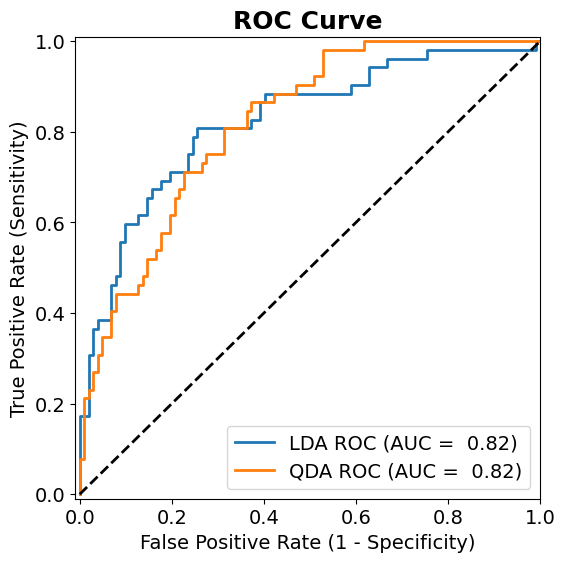

In [31]:
plt.figure(figsize=(6, 6))
plt.plot(fpr, tpr, lw=2, label='LDA ROC (AUC = {0: 0.2f})'.format(roc_auc))
plt.plot(fpr_qda, tpr_qda, lw=2, label='QDA ROC (AUC = {0: 0.2f})'.format(roc_auc_qda))
plt.plot([0, 1], [0, 1], lw=2, c = 'k', linestyle='--')
plt.xlim([-0.01, 1.0])
plt.ylim([-0.01, 1.01])
plt.xlabel('False Positive Rate (1 - Specificity)')
plt.ylabel('True Positive Rate (Sensitivity)')
plt.title('ROC Curve', fontweight='bold', fontsize=18)
plt.legend(loc="lower right");